In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

degree = 6


In [3]:
# normalise data
def normalise(X, Y):
    norm_x = ( X-min(X) ) / ( max(X)-min(X) )
    norm_y = ( Y-min(Y) ) / ( max(Y)-min(Y) )
    return norm_x, norm_y

In [4]:
# fit a polynomial of order 6

def polyX(X, d):
    poly_x = np.ones(X.shape[0]).reshape(-1,1)
    
    for i in range (1,d+1):
        poly_x = np.append(poly_x, X**i, axis=1)
    return poly_x


In [5]:
# Implement gradient computation and theta update 
def gradient_descent(X, Y, D, iters, alpha):
       
    theta = np.zeros(D+1)
    
    for i in range(iters):
        for j in range(D+1):
            theta[j] -= alpha*2*sum((np.inner(X, theta) - Y[:,0]) * X[:,j])/(X.shape[0])
    
    return theta


In [6]:
# Call stochastic gradient descent in the main loop

def stochastic_gradient_descent(X, Y, D, epochs, sample_size, alpha):
    
    theta = np.zeros(D+1)
    for i in range (epochs):
        idx = np.random.choice (X.shape[0], sample_size, replace=False)
        x_samp = X[idx]
        y_samp = Y[idx]
        
        for j in range(D+1):
            theta[j] -= alpha*2*sum((np.inner(x_samp, theta) - y_samp[:,0]) * x_samp[:,j])/(x_samp.shape[0])
    return theta  


In [7]:

norm_x, norm_y = normalise(data_x.copy(), data_y.copy())
train_x, test_x, train_y, test_y = train_test_split( norm_x, norm_y, test_size=0.2, random_state=42)
poly_train_x = polyX(train_x.copy(), degree)

theta_gd = gradient_descent(poly_train_x, train_y, degree, 10000, 0.001)
theta_sgd = stochastic_gradient_descent(poly_train_x, train_y, degree, 100000, 10, 0.0001)
print(theta_gd)
print(theta_sgd)

[0.07389136 0.25913997 0.24792536 0.19740428 0.1467712  0.10475497
 0.07179512]
[0.07382821 0.25902579 0.24787004 0.19735914 0.14671879 0.10468959
 0.0717136 ]


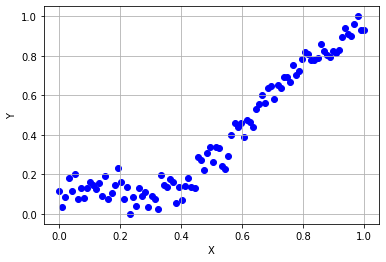

In [8]:
# plot all data

plt.scatter(norm_x, norm_y, c='b')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

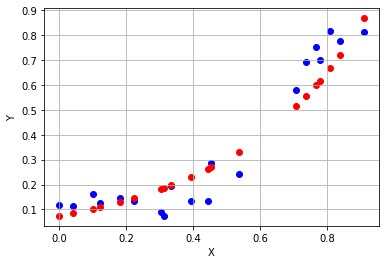

In [10]:
# plot predict y on test x by GD
poly_test_x = polyX(test_x.copy(), degree)
y_pred_gd = poly_test_x @ theta_gd

plt.scatter(test_x, test_y, c='b')
plt.scatter(test_x, y_pred_gd, c='r')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

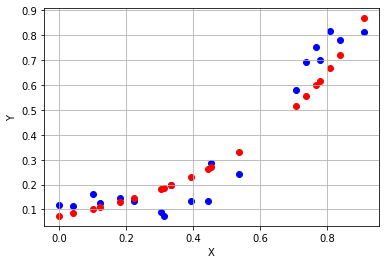

In [11]:
# plot predict y on test x by GD
poly_test_x = polyX(test_x.copy(), degree)
y_pred_sgd = poly_test_x @ theta_sgd

plt.scatter(test_x, test_y, c='b')
plt.scatter(test_x, y_pred_sgd, c='r')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()